# Database 1 - Radiação Solar de BH

# Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import os
# Para plotar figuras com condições aceitaveis
#%matplotlib inline
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)

# Onde salvar as figuras
PROJECT_ROOT_DIR = r'C:\Users\André Tavares\Desktop'
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Carregamento de Arquivo

In [2]:
arquivo = pd.read_csv('C:/Users/André Tavares/Desktop/TCC/Solcast/-19.916681_-43.934493_Solcast_PT60M.csv', 
                      parse_dates=True, index_col=1)

# Análise Exploratória

In [3]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23973 entries, 2017-12-31 01:00:00+00:00 to 2020-09-24 21:00:00+00:00
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PeriodEnd          23973 non-null  object 
 1   Period             23973 non-null  object 
 2   AirTemp            23973 non-null  float64
 3   AlbedoDaily        23973 non-null  float64
 4   Azimuth            23973 non-null  int64  
 5   CloudOpacity       23973 non-null  float64
 6   DewpointTemp       23973 non-null  float64
 7   Dhi                23973 non-null  int64  
 8   Dni                23973 non-null  int64  
 9   Ebh                23973 non-null  int64  
 10  Ghi                23973 non-null  int64  
 11  GtiFixedTilt       23973 non-null  int64  
 12  GtiTracking        23973 non-null  int64  
 13  PrecipitableWater  23973 non-null  float64
 14  RelativeHumidity   23973 non-null  float64
 15  SurfacePressure    2397

In [7]:
arquivo

,PeriodEnd,Period,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
PeriodStart,,,,,,,,,,,,,,,,,,,
2017-12-31 01:00:00+00:00,2017-12-31T02:00:00Z,PT60M,20.3,0.13,153,39.1,18.7,0,0,0,0,0,0,41.8,90.3,913.8,306,1.4,132
2017-12-31 02:00:00+00:00,2017-12-31T03:00:00Z,PT60M,20.1,0.13,171,30.6,18.5,0,0,0,0,0,0,41.8,90.4,914.0,301,1.3,136
2017-12-31 03:00:00+00:00,2017-12-31T04:00:00Z,PT60M,19.9,0.13,-169,30.5,18.3,0,0,0,0,0,0,41.7,90.7,913.8,301,1.2,136
2017-12-31 04:00:00+00:00,2017-12-31T05:00:00Z,PT60M,19.7,0.13,-151,31.0,18.2,0,0,0,0,0,0,41.6,91.1,913.3,307,1.3,131
2017-12-31 05:00:00+00:00,2017-12-31T06:00:00Z,PT60M,19.6,0.13,-138,31.0,18.1,0,0,0,0,0,0,41.5,91.4,912.8,312,1.3,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24 17:00:00+00:00,2020-09-24T18:00:00Z,PT60M,26.7,0.12,69,25.2,14.0,208,471,327,535,558,695,23.6,45.7,912.3,82,1.7,44
2020-09-24 18:00:00+00:00,2020-09-24T19:00:00Z,PT60M,25.8,0.12,77,5.1,14.1,103,721,392,495,521,852,23.5,48.3,912.1,77,1.6,58
2020-09-24 19:00:00+00:00,2020-09-24T20:00:00Z,PT60M,25.2,0.12,84,6.0,14.1,81,568,174,255,266,651,23.5,50.1,911.7,65,1.9,72


### Não possui nenhum item faltante

In [8]:
arquivo['AirTemp'].resample('D').mean()

PeriodStart
2017-12-31 00:00:00+00:00    21.930435
2018-01-01 00:00:00+00:00    22.287500
2018-01-02 00:00:00+00:00    22.304167
2018-01-03 00:00:00+00:00    22.616667
2018-01-04 00:00:00+00:00    20.954167
                               ...    
2020-09-20 00:00:00+00:00    26.308333
2020-09-21 00:00:00+00:00    22.612500
2020-09-22 00:00:00+00:00    20.037500
2020-09-23 00:00:00+00:00    19.270833
2020-09-24 00:00:00+00:00    20.554545
Freq: D, Name: AirTemp, Length: 999, dtype: float64

In [9]:
arquivo.describe()

,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
count,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000
mean,20.630280,0.120880,0.578025,19.543124,15.104526,89.522504,185.659534,120.551162,210.077796,223.524256,255.184458,27.960973,73.272811,913.385834,125.454636,2.091415,90.969466
std,4.131749,0.004436,94.533141,24.426712,3.546050,129.692835,295.716529,217.718039,292.631036,311.345991,340.288053,10.163435,17.709475,3.675604,91.408912,0.914017,44.637782
min,7.100000,0.110000,-172.000000,0.000000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.600000,900.900000,0.000000,0.000000,4.000000
25%,17.900000,0.120000,-86.000000,0.000000,12.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.500000,61.000000,910.700000,69.000000,1.500000,52.000000
50%,20.500000,0.120000,-8.000000,8.800000,15.500000,9.000000,0.000000,0.000000,13.000000,14.000000,9.000000,27.700000,77.200000,913.600000,96.000000,2.000000,90.000000
75%,23.400000,0.120000,87.000000,32.200000,17.900000,144.000000,313.000000,147.000000,398.000000,421.000000,549.000000,36.600000,87.900000,916.000000,132.000000,2.600000,130.000000
max,35.300000,0.130000,176.000000,98.900000,22.800000,636.000000,1038.000000,1021.000000,1115.000000,1087.000000,1121.000000,51.700000,100.000000,923.900000,360.000000,6.600000,175.000000


Saving figure DB2 Distribuição estatística dos atributos


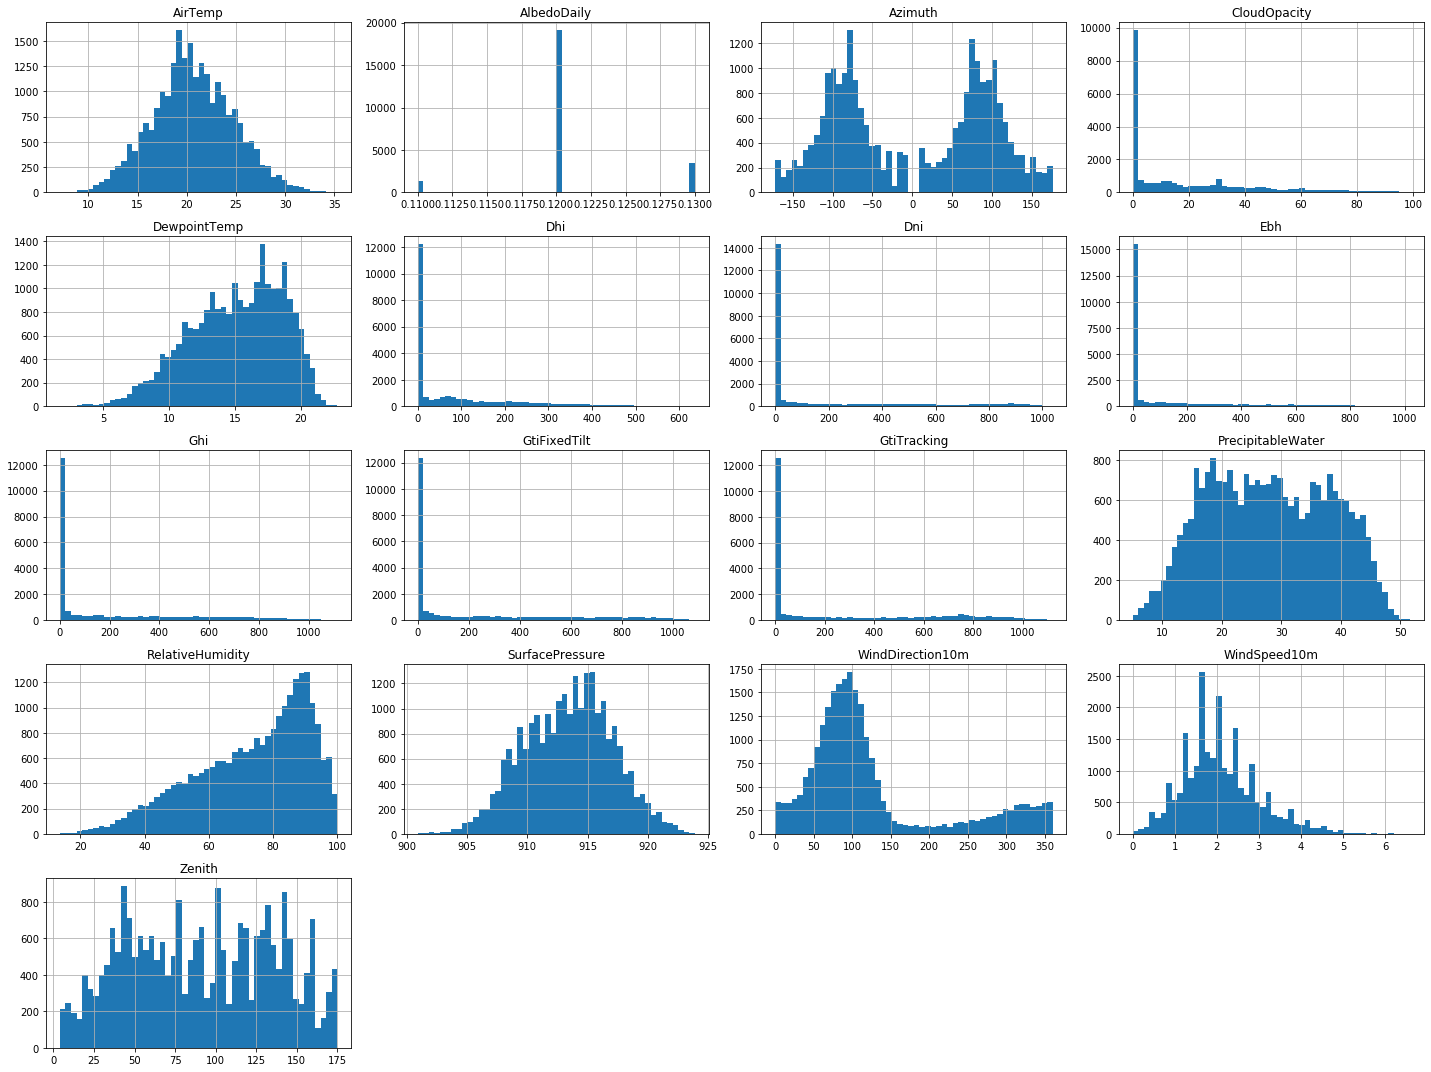

In [3]:
arquivo.hist(bins = 50, figsize=(20,15))
save_fig("DB2 Distribuição estatística dos atributos")

In [11]:
arquivo['AlbedoDaily'].value_counts()

0.12    19071
0.13     3506
0.11     1396
Name: AlbedoDaily, dtype: int64

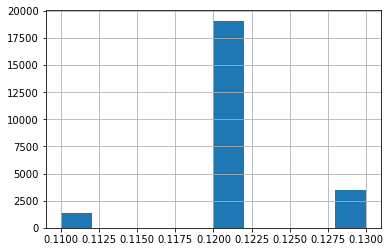

In [12]:
arquivo['AlbedoDaily'].hist()

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:1099: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


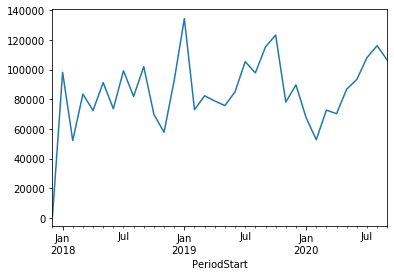

In [13]:
arquivo['Ebh'].resample('M').sum().plot(kind='line')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025698730130>,
      dtype=object)

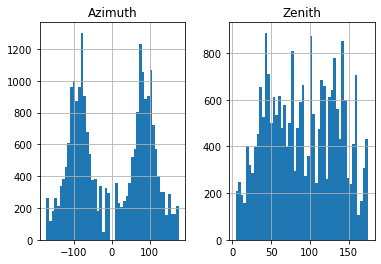

In [14]:
arquivo[['Zenith', 'Azimuth']].hist(bins=50)

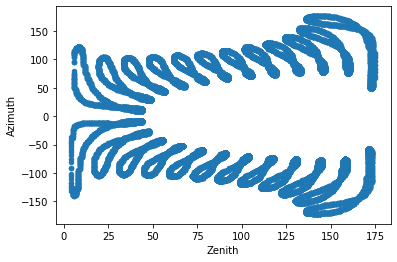

In [15]:
arquivo.plot(kind='scatter', x='Zenith',y='Azimuth')

# Análise Exploratória da Serie temporal

Saving figure Temperarura do ar em janelas temporais de mês e ano


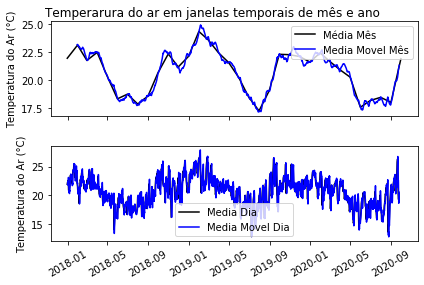

In [19]:
fig1 = plt.Figure(figsize=(40,15)); fig1, ax = plt.subplots(2,1,sharex=True,sharey=False)
ax[0].plot(arquivo['AirTemp'].resample('m').mean(), label='Média Mês', color='k')
ax[0].plot(arquivo['AirTemp'].rolling(30*24).mean(), label='Media Movel Mês', color='b')
ax[1].plot(arquivo['AirTemp'].resample('D').mean(), label='Media Dia ', color='k')
ax[1].plot(arquivo['AirTemp'].rolling(24).mean(), label='Media Movel Dia', color='b')
ax[0].legend(loc='best')
ax[0].set_ylabel('Temperatura do Ar (°C)')
ax[1].legend(loc='best')
ax[1].set_ylabel('Temperatura do Ar (°C)')
fig1.suptitle('Temperarura do ar em janelas temporais de mês e ano')
plt.xticks(rotation=30)
save_fig('Temperarura do ar em janelas temporais de mês e ano')

In [21]:
fig2 = plt.Figure(figsize=(10,7)); ax = fig2.add_subplot(1,1,1)
ax.plot(arquivo['PrecipitableWater'].rolling(30*24).mean(), color='b',label='Media móvel')
ax.plot(arquivo['PrecipitableWater'].resample('M').mean(),color='k',label='Media')
ax.legend(loc='best')
ax.set_ylabel('Água precipitavel (mm)')
ax.set_xlabel('Tempo (Mês)')
fig2.suptitle('Água precipitável no período de 2 anos')
fig2.savefig('C:/Users/André Tavares/Desktop/ESPECIALIZAÇÃO - PUCMG/Agua precipitavel em 2anos.png', dpi=400)


<IPython.core.display.Javascript object>


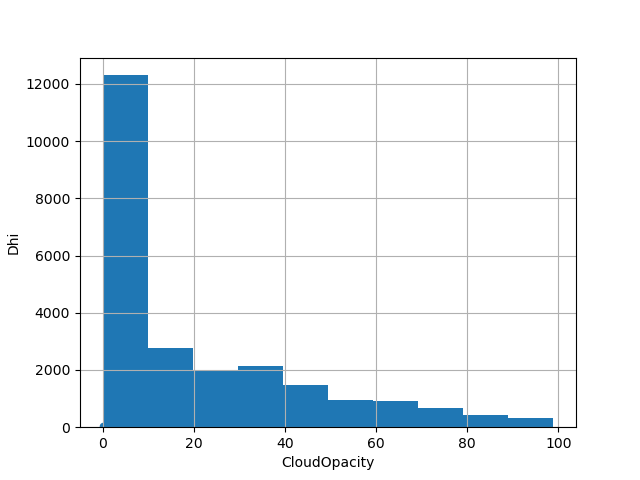

In [14]:
arquivo.resample('D').mean().plot(kind='scatter',x='CloudOpacity', y='Dhi')

Saving figure Dhi e opacidade por tempo


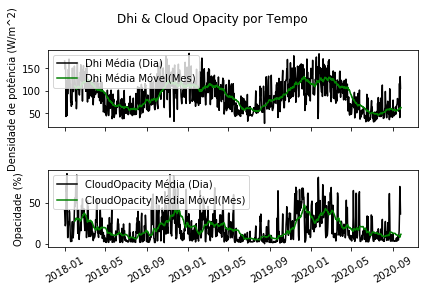

In [22]:
fig2 = plt.Figure(figsize=(10,7)); fig2, axes = plt.subplots(2,1,sharex=True,sharey=False)
atributos=['Dhi','CloudOpacity']
for atributo, it in zip(atributos,range(2)):
    axes[it].plot(arquivo[atributo].resample('d').mean(),label='{0} Média (Dia)'.format(atributo), color='k')
    axes[it].plot(arquivo[atributo].rolling(30*24).mean(),label='{0} Média Móvel(Mes)'.format(atributo), color='g')
    axes[it].legend(loc='best')
    if it == 0:
        axes[it].set_ylabel('Densidade de potência (W/m^2)')
    else:
        axes[it].set_ylabel('Opacidade (%)')
plt.xticks(rotation=30)
fig2.suptitle('Dhi & Cloud Opacity por Tempo')
save_fig('Dhi e opacidade por tempo')

In [25]:
arquivo['CloudOpacity'].hist()

# Plot da densidade de energia por tempo

Saving figure A Variação de Energia solar por mês por tipo de absorção


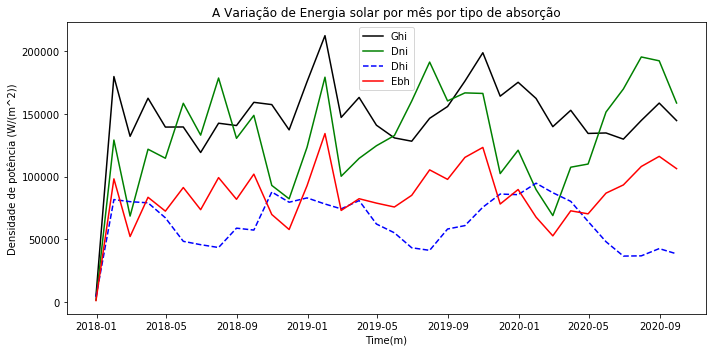

In [23]:
fig1 = plt.figure(figsize=(10,5)); ax = fig1.add_subplot(1,1,1)
os_atributos = ['Ghi','Dni','Dhi', 'Ebh']
styles =['k','g-','b--','r']
for atrib, style1 in zip(os_atributos, styles):
    ax.plot(arquivo[atrib].resample('M').sum(), style1, label=atrib)
ax.legend(loc='best')
ax.set_xlabel('Time(m)')
ax.set_ylabel('Densidade de potência (W/(m^2))')
plt.title('A Variação de Energia solar por mês por tipo de absorção')
save_fig('A Variação de Energia solar por mês por tipo de absorção')

Ghi -> Global Horizontal Irradiance (Light That comes from all the sky)
Dhi-> Diffuse Horizontal Irradiance(Light that doesn't come from the sun)
Dni-> Direct Normal Irradiance (Light only comming from the sun)
(GHI) = (DNI)* cos(zenith)  +   (DHI)

In [33]:
arquivo['PrecipitableWater'].resample('M').mean().plot()

# Analise de Correlações

In [6]:
arquivo.corr()

,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
AirTemp,1.000000,-0.025380,0.316825,0.161842,0.296300,0.565744,0.430065,0.490101,0.615381,0.585610,0.586809,0.315852,-0.647076,-0.252564,0.147342,0.166125,-0.636110
AlbedoDaily,-0.025380,1.000000,-0.003490,0.256912,0.193279,0.043549,-0.119481,-0.107725,-0.060853,-0.059383,-0.078391,0.252253,0.187042,-0.083296,0.140946,-0.032287,-0.013603
Azimuth,0.316825,-0.003490,1.000000,0.036856,0.017887,0.041003,-0.094671,-0.083075,-0.043635,-0.044992,-0.060746,0.043351,-0.290540,-0.083967,0.051964,0.080947,0.015612
CloudOpacity,0.161842,0.256912,0.036856,1.000000,0.412200,0.255017,-0.301582,-0.261475,-0.081517,-0.106000,-0.130205,0.556784,0.197782,-0.255260,0.171862,0.068042,-0.241524
DewpointTemp,0.296300,0.193279,0.017887,0.412200,1.000000,0.180067,-0.196122,-0.136434,-0.021702,-0.074343,-0.049538,0.867194,0.515510,-0.274084,0.170890,-0.085549,-0.123737
Dhi,0.565744,0.043549,0.041003,0.255017,0.180067,1.000000,0.330402,0.379118,0.725267,0.686001,0.668657,0.168504,-0.377657,-0.067401,0.150290,0.285076,-0.774266
Dni,0.430065,-0.119481,-0.094671,-0.301582,-0.196122,0.330402,1.000000,0.944703,0.849300,0.879371,0.911955,-0.280864,-0.541141,0.138406,-0.022935,0.141333,-0.620241
Ebh,0.490101,-0.107725,-0.083075,-0.261475,-0.136434,0.379118,0.944703,1.000000,0.912033,0.923580,0.901777,-0.206741,-0.542282,0.108338,-0.005972,0.158002,-0.629662
Ghi,0.615381,-0.060853,-0.043635,-0.081517,-0.021702,0.725267,0.849300,0.912033,1.000000,0.991187,0.967280,-0.079134,-0.570842,0.050738,0.062161,0.243905,-0.811630
GtiFixedTilt,0.585610,-0.059383,-0.044992,-0.106000,-0.074343,0.686001,0.879371,0.923580,0.991187,1.000000,0.963916,-0.128903,-0.585533,0.079699,0.060286,0.233845,-0.797789


In [25]:
atributos=[]
for at in arquivo.columns:
    atributos.append(at)
atributos_removal = ['AlbedoDaily','Zenith','Azimuth','SurfacePressure','WindSpeed10m','WindDirection10m']
for at in atributos_removal:
    atributos.remove(at)


Saving figure scatteplot db1


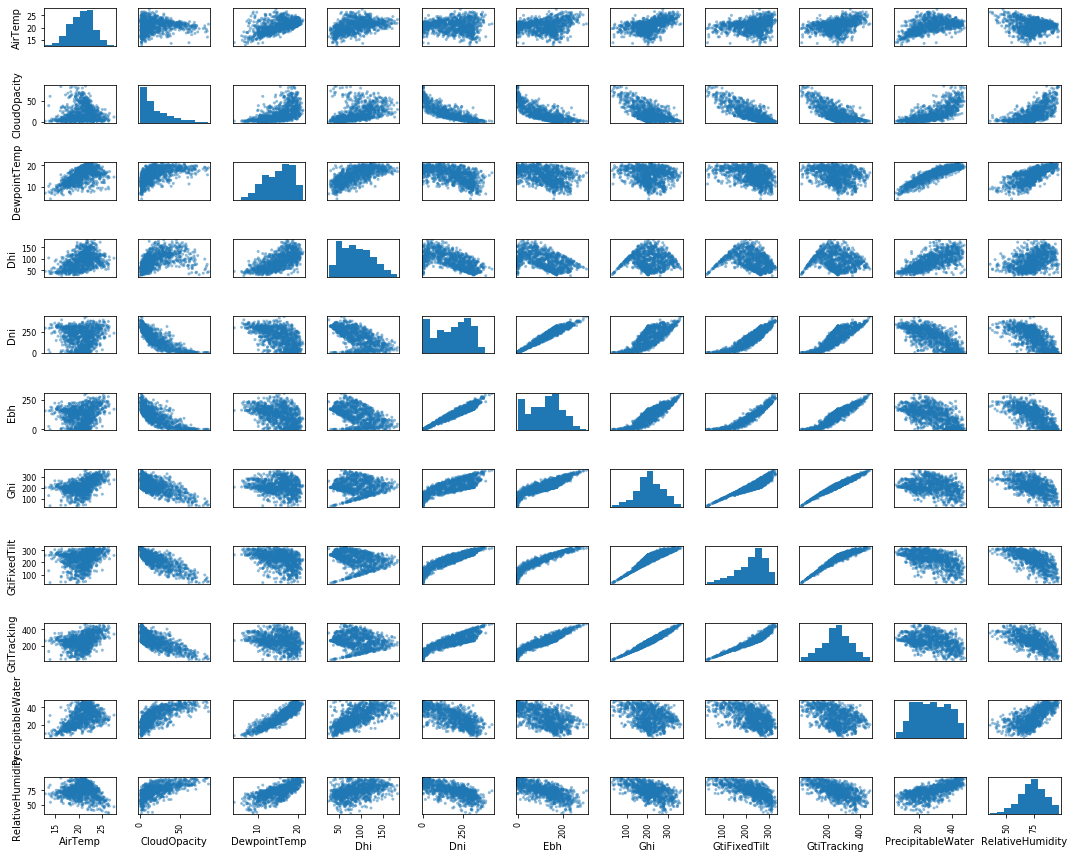

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(arquivo[atributos].resample('D').mean(), figsize=(15,12))
save_fig('scatteplot db1')

<IPython.core.display.Javascript object>


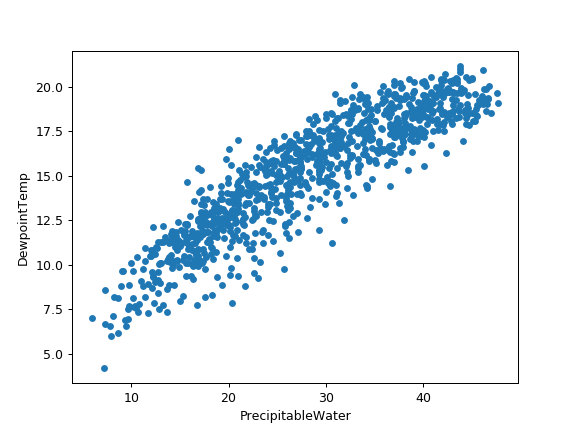

In [80]:
arquivo.resample('D').mean().plot(kind='scatter',x='PrecipitableWater', y='DewpointTemp')

<IPython.core.display.Javascript object>


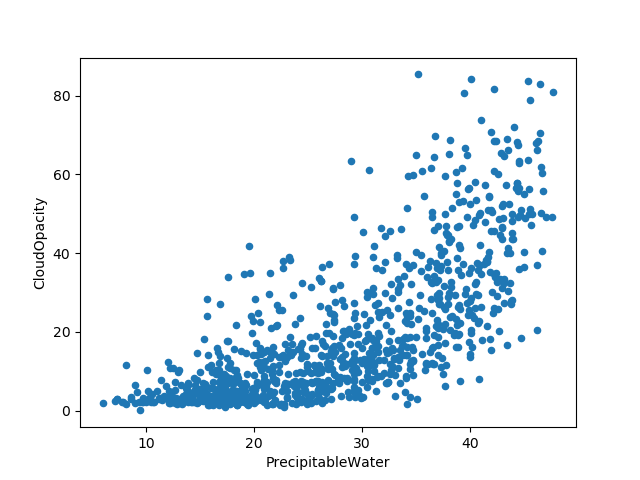

In [64]:
arquivo.resample('D').mean().plot(kind='scatter',x='PrecipitableWater', y='CloudOpacity')# Bom candidato

<IPython.core.display.Javascript object>


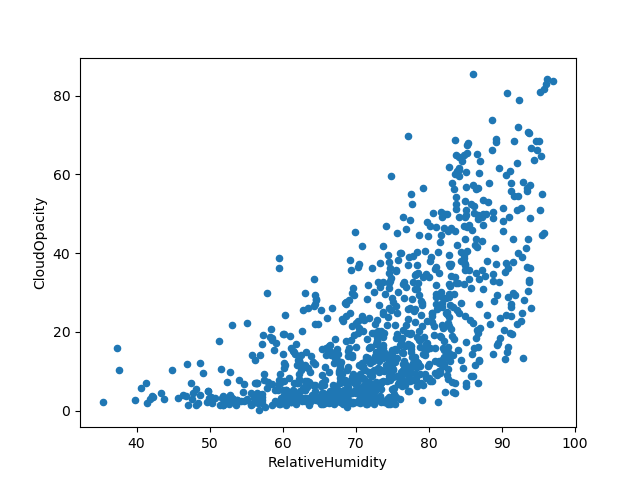

In [84]:
arquivo.resample('D').mean().plot(kind='scatter',x='RelativeHumidity', y='CloudOpacity')

# Modelos de Machine Learning

In [4]:
from sklearn.model_selection import train_test_split
x=np.array(arquivo['PrecipitableWater'].resample('D').mean()).reshape(-1,1)
y=np.array(arquivo['CloudOpacity'].resample('D').mean())
x_train, x_test, y_train, y_test = train_test_split(x,y)


In [5]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=10,max_depth=5)
model.fit(x, y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

Text(0.5, 1.0, 'No restrictions')

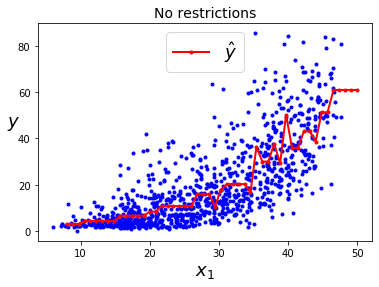

In [6]:
#plot
x1 = np.linspace(8, 50).reshape(-1, 1)
y_pred1 = model.predict(x1)
plt.plot(x, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(12.576716447298043, array([-1.12475106,  0.04361909]))

Saving figure quadratic_predictions_plot


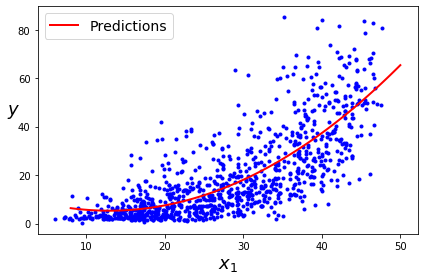

In [25]:
X_new=np.linspace(8, 50, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(x, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
save_fig("quadratic_predictions_plot")
plt.show()

In [ ]:
Fazer tambem Dni por CloudOpacity

In [10]:
def mostrar_resultados(scores):
    print("Scores:", scores)
    print("Media:", scores.mean())
    print("Desvio Padrão:", scores.std())

In [12]:
#Para Arvore
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, x , y, scoring ='neg_mean_squared_error', cv=10)
rmse_tree_scores = np.sqrt(-scores)

In [13]:
mostrar_resultados(rmse_tree_scores)

Scores: [14.99295772  7.71269593 11.77722055 14.88274115 12.83447706  7.99131829
 12.11027832 12.79662567 12.82589027 11.62061009]
Media: 11.954481504549115
Desvio Padrão: 2.321994103546615


In [28]:
#Para regressão Linear
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lin_reg, x , y, scoring ='neg_mean_squared_error', cv=10)
rmse_linreg_scores = np.sqrt(-scores)

In [29]:
mostrar_resultados(rmse_linreg_scores)

Scores: [15.0293032   7.77770152 10.98942024 15.31989084 12.96149333  7.16121945
 12.46543222 13.89456296 13.24650391 11.70840565]
Media: 12.05539333223012
Desvio Padrão: 2.6229717232783485


In [21]:
mostrar_resultados(rmse_linreg_scores)

Scores: [2.78062819e+11 1.47792630e+12 1.41369006e+11 4.11831321e+10
 1.41237293e+12 1.20689378e+12 8.44715766e+11 9.54052752e+11
 8.73682373e+11 5.04223216e+12]
Media: 1227249102623.9453
Desvio Padrão: 1359574936151.2932


# Engenharia Reversa


In [22]:
Dni = list(arquivo['Dni'])
Zenith = list(arquivo['Zenith'])
Dhi = list(arquivo['Dhi'])
Ghi=[]
Cosp=[]
for i in range(len(Dni)):
    cosproduct = (Dni[i]*math.cos(Zenith[i]))
    Cosp.append((cosproduct**2)**0.5)
    resposta = (cosproduct**2)**0.5 + Dhi[i]
    Ghi.append(resposta)
Ghi_exp = list(arquivo['Ghi'])
Df= pd.DataFrame({'Dni':Dni, 'Zenith':Zenith, 'Dhi':Dhi,'Cosp':Cosp,'Ghi_teo':Ghi,'Ghi_exp':Ghi_exp})
Df.set_index(pd.period_range(2018,periods=23973, freq='h'))


,Dni,Zenith,Dhi,Cosp,Ghi_teo,Ghi_exp
2018-01-01 00:00,0,132,0,0.000000,0.000000,0
2018-01-01 01:00,0,136,0,0.000000,0.000000,0
2018-01-01 02:00,0,136,0,0.000000,0.000000,0
2018-01-01 03:00,0,131,0,0.000000,0.000000,0
2018-01-01 04:00,0,123,0,0.000000,0.000000,0
...,...,...,...,...,...,...
2020-09-25 16:00,471,44,208,470.926198,678.926198,535
2020-09-25 17:00,721,58,103,85.928878,188.928878,495
2020-09-25 18:00,568,72,81,549.398334,630.398334,255
2020-09-25 19:00,240,86,19,92.087627,111.087627,53


In [29]:
Dni = list(arquivo['Dni'])
Zenith = list(arquivo['Zenith'])
Dhi = list(arquivo['Dhi'])
Ghi=[]
Cosp=[]
for i in range(len(Dni)):
    cosproduct = ((Dni[i]*math.sin(Zenith[i])**2)**0.5)
    Cosp.append((cosproduct**2)**0.5)
    resposta = (cosproduct) + Dhi[i]
    Ghi.append(resposta)
Ghi_exp = list(arquivo['Ghi'])
Df= pd.DataFrame({'Dni':Dni, 'Zenith':Zenith, 'Dhi':Dhi,'Cosp':Cosp,'Ghi_teo':Ghi,'Ghi_exp':Ghi_exp})
Df.set_index(pd.period_range(2018,periods=23973, freq='h'))


,Dni,Zenith,Dhi,Cosp,Ghi_teo,Ghi_exp
2018-01-01 00:00,0,132,0,0.000000,0.000000,0
2018-01-01 01:00,0,136,0,-0.000000,0.000000,0
2018-01-01 02:00,0,136,0,-0.000000,0.000000,0
2018-01-01 03:00,0,131,0,-0.000000,0.000000,0
2018-01-01 04:00,0,123,0,-0.000000,0.000000,0
...,...,...,...,...,...,...
2020-09-25 16:00,471,44,208,8.337607,216.337607,535
2020-09-25 17:00,721,58,103,715.861179,818.861179,495
2020-09-25 18:00,568,72,81,144.171670,225.171670,255
2020-09-25 19:00,240,86,19,-221.630027,-202.630027,53


<IPython.core.display.Javascript object>


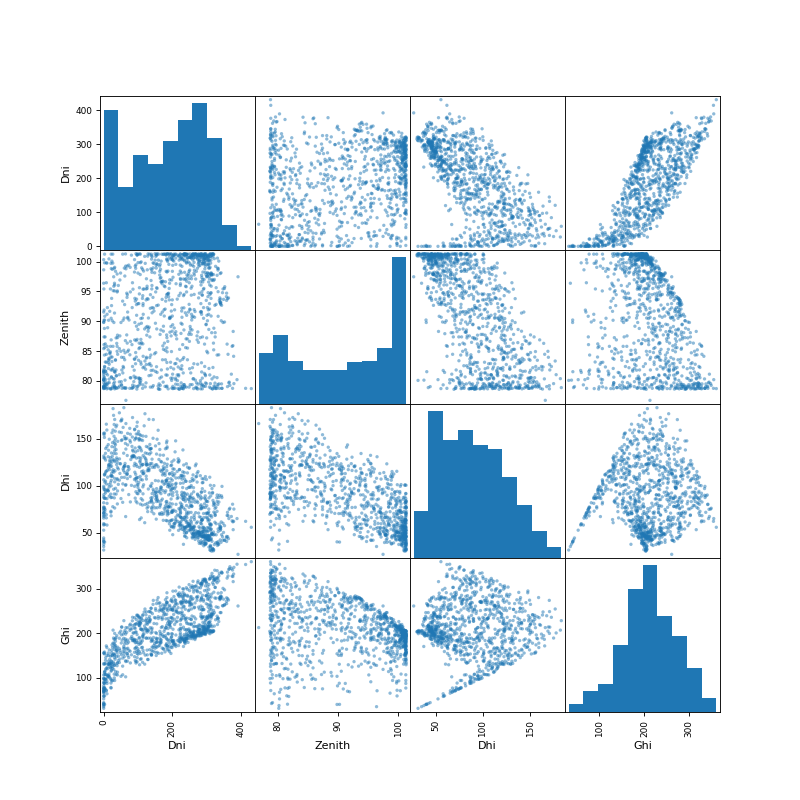

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C4DA20400>,
      dtype=object)

In [99]:
atributos=['Dni','Zenith','Dhi','Ghi']
scatter_matrix(arquivo[atributos].resample('D').mean(), figsize=(10,10))

<IPython.core.display.Javascript object>


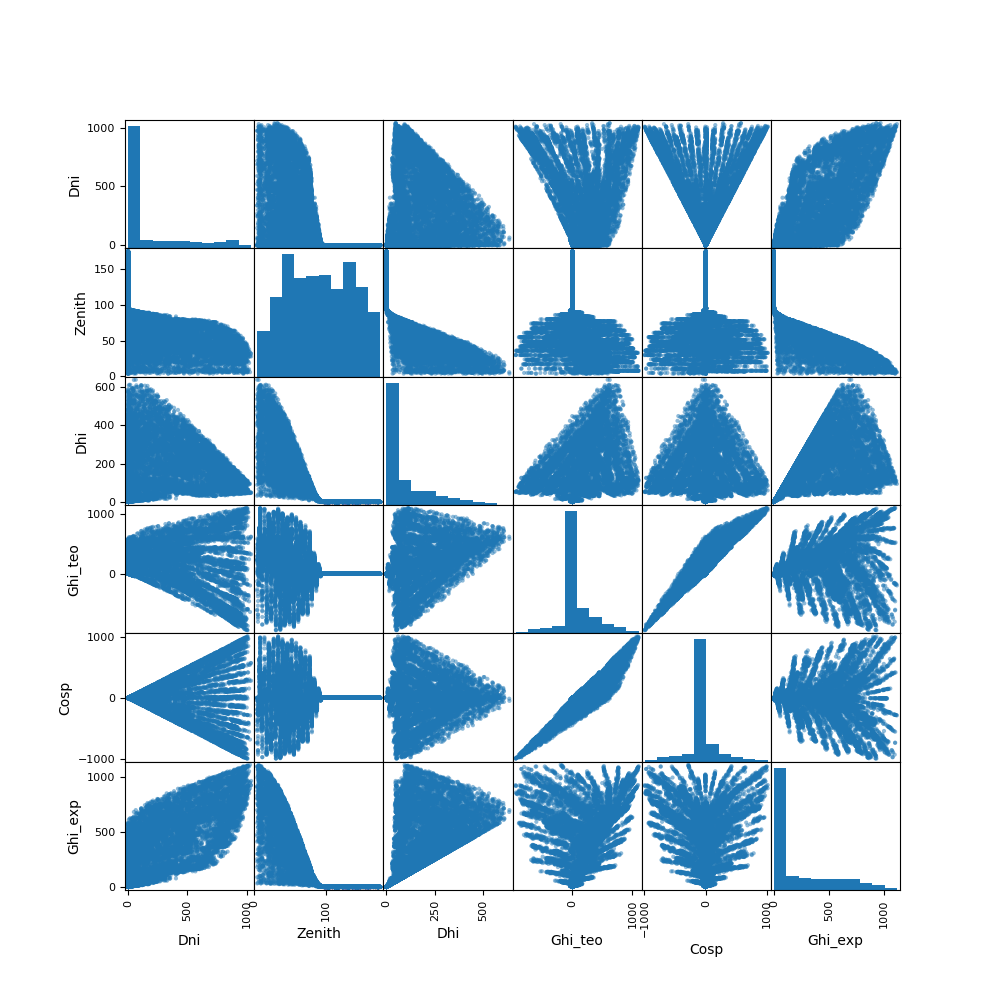

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001823AB28520>,
      dtype=object)

In [26]:
atributos=['Dni','Zenith','Dhi','Ghi_teo','Cosp','Ghi_exp']
from pandas.plotting import scatter_matrix
scatter_matrix(Df[atributos], figsize=(10,10))

<IPython.core.display.Javascript object>


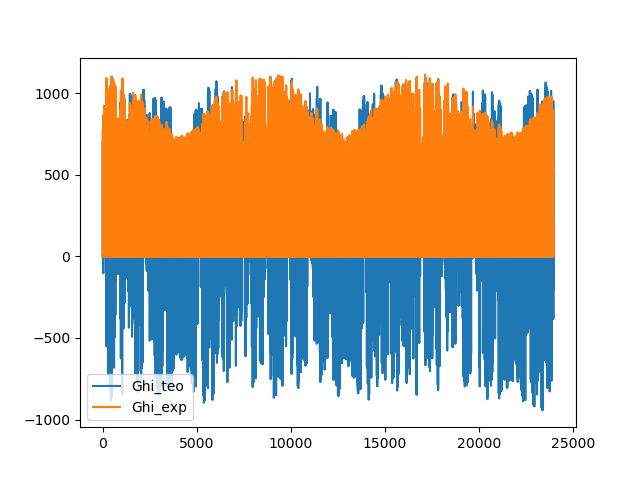

In [27]:
Df[['Ghi_teo','Ghi_exp']].plot()

In [107]:
arquivo['Dhi'].min()

0

Variar Zenith e Azimuth com o tempo (Comportamento ciclico? Estações do ano?)

Conclusão: Este arquivo de dados não possui nenhum dado categórico de relevância, sem variáveis explicativas ou variáveis resposta.

In [30]:
Df.corr()

,Dni,Zenith,Dhi,Cosp,Ghi_teo,Ghi_exp
Dni,1.000000,-0.620241,0.330402,-0.072569,0.091072,0.849300
Zenith,-0.620241,1.000000,-0.774266,0.028640,-0.338293,-0.811630
Dhi,0.330402,-0.774266,1.000000,-0.000273,0.469342,0.725267
Cosp,-0.072569,0.028640,-0.000273,1.000000,0.882888,-0.046435
Ghi_teo,0.091072,-0.338293,0.469342,0.882888,1.000000,0.299570
Ghi_exp,0.849300,-0.811630,0.725267,-0.046435,0.299570,1.000000


# Salvar arquivo para análise 3

In [17]:
join2 = arquivo['2018':'2020-09-23']

In [18]:
join2.to_csv('C:/Users/André Tavares/Desktop/TCC/Open Weather/solar18-20.csv')